In [54]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set(style='ticks', palette='husl')
%matplotlib inline

In [55]:
kidiq = pd.read_stata('kidiq.dta')
print(kidiq)

     kid_score  mom_hs      mom_iq  mom_work  mom_age
0           65     1.0  121.117529         4       27
1           98     1.0   89.361882         4       25
2           85     1.0  115.443165         4       27
3           83     1.0   99.449639         3       25
4          115     1.0   92.745710         4       27
..         ...     ...         ...       ...      ...
429         94     0.0   84.877412         4       21
430         76     1.0   92.990392         4       23
431         50     0.0   94.859708         2       24
432         88     1.0   96.856624         2       21
433         70     1.0   91.253336         2       25

[434 rows x 5 columns]


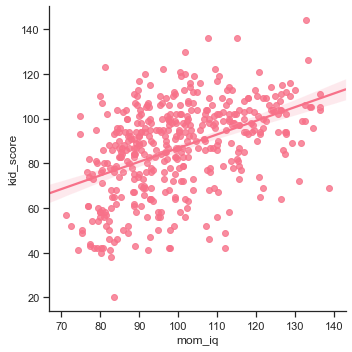

In [56]:
sns.lmplot("mom_iq","kid_score",kidiq)
sns.despine()

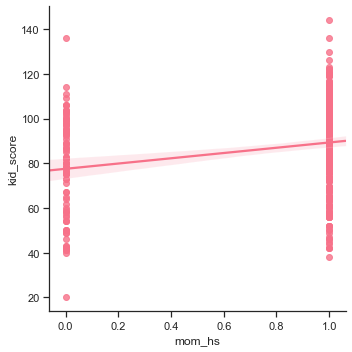

In [57]:
sns.lmplot("mom_hs","kid_score",kidiq)
sns.despine()

/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


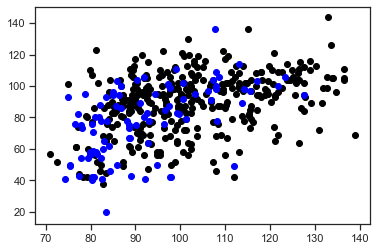

In [59]:
kidiq_nohs = kidiq[kidiq['mom_hs'] == 0]
kidiq_hs = kidiq[kidiq['mom_hs'] == 1]
X_hs = kidiq_hs.as_matrix(["mom_iq"])
Y_hs = kidiq_hs.as_matrix(["kid_score"])
X_nohs = kidiq_nohs.as_matrix(["mom_iq"])
Y_nohs = kidiq_nohs.as_matrix(["kid_score"])

plt.scatter(X_hs, Y_hs,  color='black')
plt.scatter(X_nohs, Y_nohs,  color='blue')

The above graph has given us some insight into how the line of best fit changes when the mother went to highschool/did not go to highschool. It appears the mom's IQ is more important when the mother went to highschool. Let us try and insert an interaction feature to emphasize this relationship in the data.

In [66]:
kidiq = pd.read_stata('kidiq.dta')
kidiq.insert(5, 'InteractiveFeature',0)

for index, row in kidiq.iterrows():  
    kidiq.loc[index,'InteractiveFeature'] = kidiq.loc[index,'mom_hs']*kidiq.loc[index,'mom_iq']
    
print(kidiq)

     kid_score  mom_hs      mom_iq  mom_work  mom_age  InteractiveFeature
0           65     1.0  121.117529         4       27          121.117529
1           98     1.0   89.361882         4       25           89.361882
2           85     1.0  115.443165         4       27          115.443165
3           83     1.0   99.449639         3       25           99.449639
4          115     1.0   92.745710         4       27           92.745710
..         ...     ...         ...       ...      ...                 ...
429         94     0.0   84.877412         4       21            0.000000
430         76     1.0   92.990392         4       23           92.990392
431         50     0.0   94.859708         2       24            0.000000
432         88     1.0   96.856624         2       21           96.856624
433         70     1.0   91.253336         2       25           91.253336

[434 rows x 6 columns]


In [67]:
# Without the interaction feature

kidiq_X_noif = kidiq.as_matrix(["mom_iq","mom_hs"])
kidiq_Y_noif = kidiq.as_matrix(["kid_score"])
lr_noif = linear_model.LinearRegression()
lr_noif.fit(kidiq_X_noif, kidiq_Y_noif)
print(lr_noif.coef_,lr_noif.intercept_)
print(lr_noif.score(kidiq_X_noif,kidiq_Y_noif))

[[0.56390605 5.95011691]] [25.73153818]
0.21414651708983581


/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [68]:
# With the interaction feature

kidiq_X_if = kidiq.as_matrix(["mom_iq","mom_hs","InteractiveFeature"])
kidiq_Y_if = kidiq.as_matrix(["kid_score"])
lr_if = linear_model.LinearRegression()
lr_if.fit(kidiq_X_if,kidiq_Y_if)
print(lr_if.coef_,lr_if.intercept_)
print(lr_if.score(kidiq_X_if,kidiq_Y_if))

[[ 0.96888921 51.26822343 -0.48427467]] [-11.48202114]
0.230103627921438


/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/andrewannetrand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


As we can see, when we include the interaction feature into the linear regession, our $R^2$ value increases. This tells us that our model is a bit more accurate. Also, it seems like all of are coefficients/intercept have changed. Let's investigate how this interaction feature has affected the linear regression model.

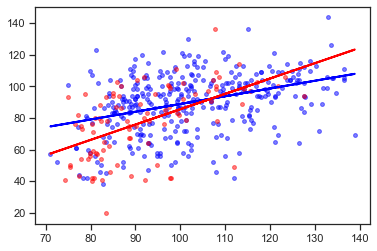

In [83]:
plt.scatter(X_hs, Y_hs, color='blue',alpha=.5, s=15)
plt.plot(X_hs, (.97-.48)*X_hs +51.3 - 11.48, linewidth=2, color='blue')
plt.scatter(X_nohs, Y_nohs, color='red', alpha=.5, s=15)
plt.plot(X_hs, (.97)*X_hs - 11.48, linewidth=2, color='red')

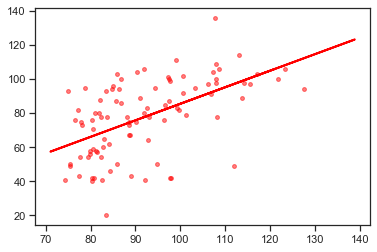

In [84]:
plt.scatter(X_nohs, Y_nohs, color='red', alpha=.5, s=15)
plt.plot(X_hs, (.97)*X_hs - 11.48, linewidth=2, color='red')

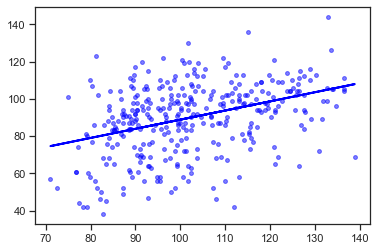

In [81]:
plt.scatter(X_hs, Y_hs, color='blue',alpha=.5, s=15)
plt.plot(X_hs, (.97-.48)*X_hs +51.3 - 11.48, linewidth=2, color='blue')

It appears the interaction feature that we included has essentially created two lines of best fit based on the conition of mom_hs. Now, we can target the unique relationship between mom_iq weight and mom_hs condition to provide a more accurate prediction. Therefore, the introduction of this interaction term decreases our model's training error.